In [2]:
# Load Pandas library
import pandas as pd

#Load numpy library
import numpy as np

#import MatPlotLib
import matplotlib as mpl 

#Import PyPlot in MatPlotLib
import matplotlib.pyplot as plt 

#Import SciKitLearn decomposition PCA library
from sklearn.decomposition import PCA

#Import SciKitLearn dataset 
from sklearn import datasets as ds

#Seaborn 
import seaborn as sb

#Magics for inline code.
%matplotlib inline

#Create Zillow Data Frame using Read_CSV
# read in the csv file
dfZillowData = pd.read_csv('/users/cmirwin/desktop/Smu Data Sets/Data Mining/ZillowData/Properties_2016.csv') 


/Users/cmirwin/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
#Show headers and first 10 records of the data set 
#dfZillowData.head(10)
#dfZillowData.info()



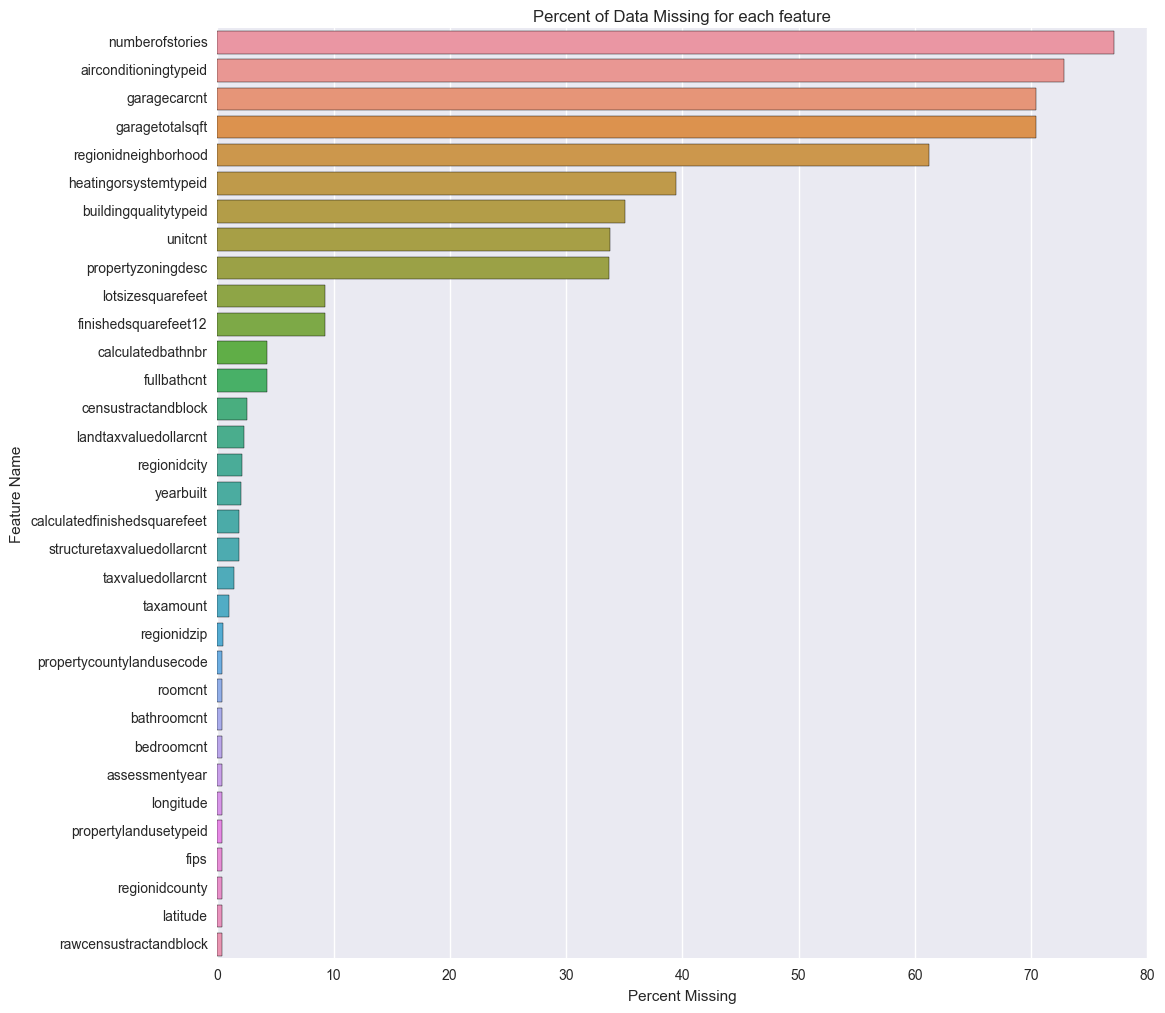

In [3]:
#Look to see if there are any missing values in data frame
dfZillowData.isnull().values.any()

#Find all columns with missing data 
dfMissingZillowData = (dfZillowData.isnull().sum() / len(dfZillowData)) * 100

#Delete from dataframe with values of 0
dfMissingZillowData = dfMissingZillowData.drop(dfMissingZillowData[dfMissingZillowData == 0].index).sort_values(ascending=False)

#Create new dataframe any values greater than 80%
dfMajorityOfDataMissing = dfMissingZillowData.drop(dfMissingZillowData[dfMissingZillowData < 80].index).sort_values(ascending=False)

#Create new dataframe with total missing less than 80%
dfMissingZillowData = dfMissingZillowData.drop(dfMissingZillowData[dfMissingZillowData > 80].index).sort_values(ascending=False)


#Create Graph that shows the missing data
#Set Color palette to standard
color = sb.color_palette()

#set up Figure size
f, ax = plt.subplots(figsize=(12, 12))

#Rotate lables
plt.xticks(rotation='0')

#Add Bar Plots
sb.barplot(y=dfMissingZillowData.index, x=dfMissingZillowData)

#Add Titles to Graph
ax.set(title='Percent of Data Missing for each feature', xlabel='Percent Missing', ylabel = 'Feature Name')

In [43]:
#We can see that a number of the data columns have NaN values that were assigned during import
#we choose to replace those values with the median values for the variable.

#Create new columns with highest missing values as True/False.
#print(dfMajorityOfDataMissing)

dfZillowData['hasbasement'] = dfZillowData[['basementsqft']].where(dfZillowData[['basementsqft']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hasdeck'] = dfZillowData[['yardbuildingsqft26']].where(dfZillowData[['yardbuildingsqft26']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hasfireplace'] = dfZillowData[['fireplaceflag']].where(dfZillowData[['fireplaceflag']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hashottuborspa'] = dfZillowData[['hashottuborspa', 'pooltypeid2']].where(dfZillowData[['hashottuborspa','pooltypeid2']].isnull(), 1).fillna(0).astype(int)

dfZillowData['haspatio'] = dfZillowData[['yardbuildingsqft17']].where(dfZillowData[['yardbuildingsqft17']].isnull(), 1).fillna(0).astype(int)

#Create Function for County Rename
def rename(row):
    if row['regionidcounty'] == 1286:
        val = 'Ventura County'
    elif row['regionidcounty'] == 3101:
        val = 'Los Angles County'
    else:
        val = 'Orange County'
    return val

dfZillowData['countyname'] = dfZillowData.apply(rename, axis=1)

In [44]:
#Create New data frame for everything
dfForModel = dfZillowData.replace(to_replace='NaN',value= np.nan) 

#Get median values for based on original values
dfMedians = pd.DataFrame(dfZillowData.median())

#Add Column Name to Medians DataFrame
dfMedians.columns = ['medianvalue']

#Create custom updates
dfColumns = pd.DataFrame(pd.Series([1.,0.,0.
                                    ,0.,0.,0.
                                    ,0.,0.,0.
                                    ,13.,5.,0.
                                    ,24.,0.,0.
                                    ,0.,0.,0.
                                    ,0.]
              , index=['numberofstories', 'bathroomcnt','bedroomcnt'
                      ,'fireplacecnt','fullbathcnt','garagecarcnt'
                      , 'poolcnt', 'roomcnt','unitcnt'
                      , 'heatingorsystemtypeid','airconditioningtypeid', 'garagetotalsqft'
                      , 'storytypeid', 'basementsqft', 'finishedsquarefeet13'
                      , 'finishedsquarefeet6','finishedsquarefeet15','finishedsquarefeet50'
                      , 'finishedfloor1squarefeet']))


#Set Column Name
dfColumns.columns = ['updatevalue']


#Create Merged Data set with values of both medians and custom
dfMerged = pd.concat([dfMedians, dfColumns], axis=1, join_axes=[dfMedians.index])

#Create new column of data that is custom values filled with median for any null
dfMerged['values'] = dfMerged['updatevalue'].fillna(dfMerged['medianvalue'])

#Apply median values to the overall data set
dfForModel = dfForModel.fillna(dfMerged['values'])

#Create smaller data set for descriptive stats section
dfDataForStats = dfForModel[['bathroomcnt',
                               'bedroomcnt',
                               'finishedfloor1squarefeet',
                               'calculatedfinishedsquarefeet',
                               'finishedsquarefeet15',
                               'lotsizesquarefeet',
                               'taxvaluedollarcnt',
                               'structuretaxvaluedollarcnt',
                               'landtaxvaluedollarcnt',
                               'taxamount']]

dfDataForStats.describe()


,bathroomcnt,bedroomcnt,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet15,lotsizesquarefeet,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
count,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06
mean,2.200661e+00,3.077101e+00,9.375441e+01,1.822413e+03,1.750732e+02,2.135937e+04,4.188485e+05,1.699941e+05,2.505395e+05,5.363100e+03
std,1.084325e+00,1.287645e+00,3.845107e+02,1.803095e+03,1.531509e+03,3.216346e+05,7.212790e+05,3.984014e+05,4.401196e+05,9.136004e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.340000e+00
25%,2.000000e+00,2.000000e+00,0.000000e+00,1.220000e+03,0.000000e+00,5.874000e+03,1.817350e+05,7.564100e+04,7.710000e+04,2.478050e+03
50%,2.000000e+00,3.000000e+00,0.000000e+00,1.572000e+03,0.000000e+00,7.000000e+03,3.060860e+05,1.225900e+05,1.670420e+05,3.991780e+03
75%,3.000000e+00,4.000000e+00,0.000000e+00,2.120000e+03,0.000000e+00,9.216000e+03,4.840000e+05,1.947780e+05,3.022000e+05,6.166200e+03
max,2.000000e+01,2.000000e+01,3.130300e+04,9.525760e+05,8.202420e+05,3.282638e+08,2.827860e+08,2.514860e+08,9.024622e+07,3.458861e+06


In [6]:
#Create dummy variables for all TypeId columns
#This section takes a long time due to the fact that we are creating 
#so many additional variables by 3 million records. 

#heatingorsystemtypeid
#Create dynamic Name
dummies = pd.get_dummies(dfForModel['heatingorsystemtypeid']).rename(columns=lambda x: 'HSTypeId_' + str(x))
#Join to Dataframe for Model
dfForModel = pd.concat([dfForModel, dummies], axis=1)

#Delete from model 
#dfForModel.drop(['heatingorsystemtypeid'], inplace=True, axis=1)

#Repeat of code above
#airconditioningtypeid
dummies = pd.get_dummies(dfForModel['airconditioningtypeid']).rename(columns=lambda x: 'ACTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['airconditioningtypeid'], inplace=True, axis=1)

#architecturalstyletypeid
dummies = pd.get_dummies(dfForModel['architecturalstyletypeid']).rename(columns=lambda x: 'ArchStyleTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['architecturalstyletypeid'], inplace=True, axis=1)

#decktypeid
dummies = pd.get_dummies(dfForModel['decktypeid']).rename(columns=lambda x: 'DeckTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['decktypeid'], inplace=True, axis=1)

#buildingclasstypeid
dummies = pd.get_dummies(dfForModel['buildingclasstypeid']).rename(columns=lambda x: 'BuildClassTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['buildingclasstypeid'], inplace=True, axis=1)

#typeconstructiontypeid
dummies = pd.get_dummies(dfForModel['typeconstructiontypeid']).rename(columns=lambda x: 'ConstructionTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['typeconstructiontypeid'], inplace=True, axis=1)

#buildingqualitytypeid
dummies = pd.get_dummies(dfForModel['buildingqualitytypeid']).rename(columns=lambda x: 'BuildingQualTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['buildingqualitytypeid'], inplace=True, axis=1)

#propertylandusetypeid
dummies = pd.get_dummies(dfForModel['propertylandusetypeid']).rename(columns=lambda x: 'LandUseTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['propertylandusetypeid'], inplace=True, axis=1)

#As you can see we have gone from 58 columns in the original data set to 244 now with 
#the creation of Dummy variables and binary variables
dfForModel.describe()


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,LandUseTypeId_260.0,LandUseTypeId_261.0,LandUseTypeId_263.0,LandUseTypeId_264.0,LandUseTypeId_265.0,LandUseTypeId_266.0,LandUseTypeId_267.0,LandUseTypeId_269.0,LandUseTypeId_270.0,LandUseTypeId_275.0
count,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2985217.0,...,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06
mean,1.332586e+07,4.165750e+00,7.000411e+00,3.527804e-01,2.200661e+00,3.077101e+00,3.998841e+00,6.210886e+00,2.286339e+00,66.0,...,9.225460e-04,7.234982e-01,1.957580e-02,6.833674e-05,3.155884e-03,1.611498e-01,6.086660e-04,2.059113e-02,1.205942e-05,4.023158e-04
std,7.909966e+06,2.135222e+00,1.101467e-01,1.965456e+01,1.084325e+00,1.287645e+00,3.716363e-02,1.566111e+00,9.807784e-01,0.0,...,3.035943e-02,4.472680e-01,1.385373e-01,8.266323e-03,5.608855e-02,3.676691e-01,2.466365e-02,1.420111e-01,3.472648e-03,2.005378e-02
min,1.071172e+07,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,66.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.164371e+07,5.000000e+00,7.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,66.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.254509e+07,5.000000e+00,7.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,7.000000e+00,2.000000e+00,66.0,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.409712e+07,5.000000e+00,7.000000e+00,0.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,7.000000e+00,3.000000e+00,66.0,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.696019e+08,1.300000e+01,2.700000e+01,8.516000e+03,2.000000e+01,2.000000e+01,5.000000e+00,1.200000e+01,2.000000e+01,66.0,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


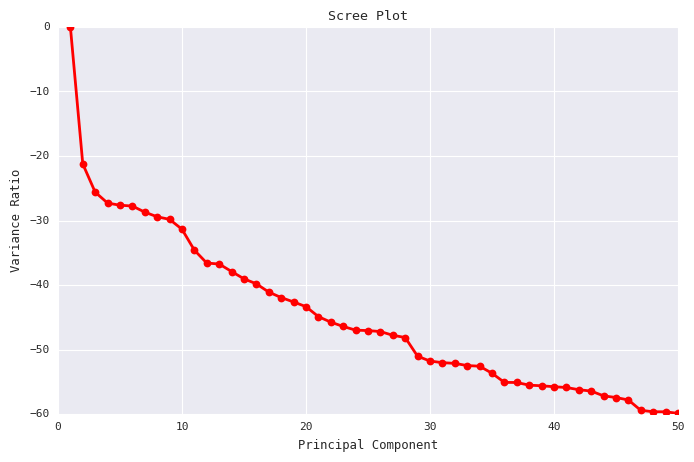

In [48]:
#Find out what data types are in the Data set
dfDataTypes = pd.DataFrame(dfForModel)

#Create Numeric Only Dataframe
dfZillowDataNumeric = dfDataTypes.select_dtypes(['float64','int64'])
    
#Create Object only Datafram
dfZillowDataCat = dfDataTypes.select_dtypes(['object'])

#Complete PCA to help with eliminating variables 
#Using only numeric Data
ZillowDataPCA = dfZillowDataNumeric

pca = PCA( n_components= components)

#Run PCA
ZillowDataPCA_pca = pca.fit(ZillowDataPCA).transform(ZillowDataPCA) # fit data and then transform it

varianceratio = pca.explained_variance_ratio_

logVarianceRatio = np.log(varianceratio)

#Create Figure size.
fig = plt.figure(figsize=(8,5))
#Create X axis values for each component
CompentValues = np.arange(components) + 1
#Plot components
plt.plot(CompentValues, logVarianceRatio, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.show()



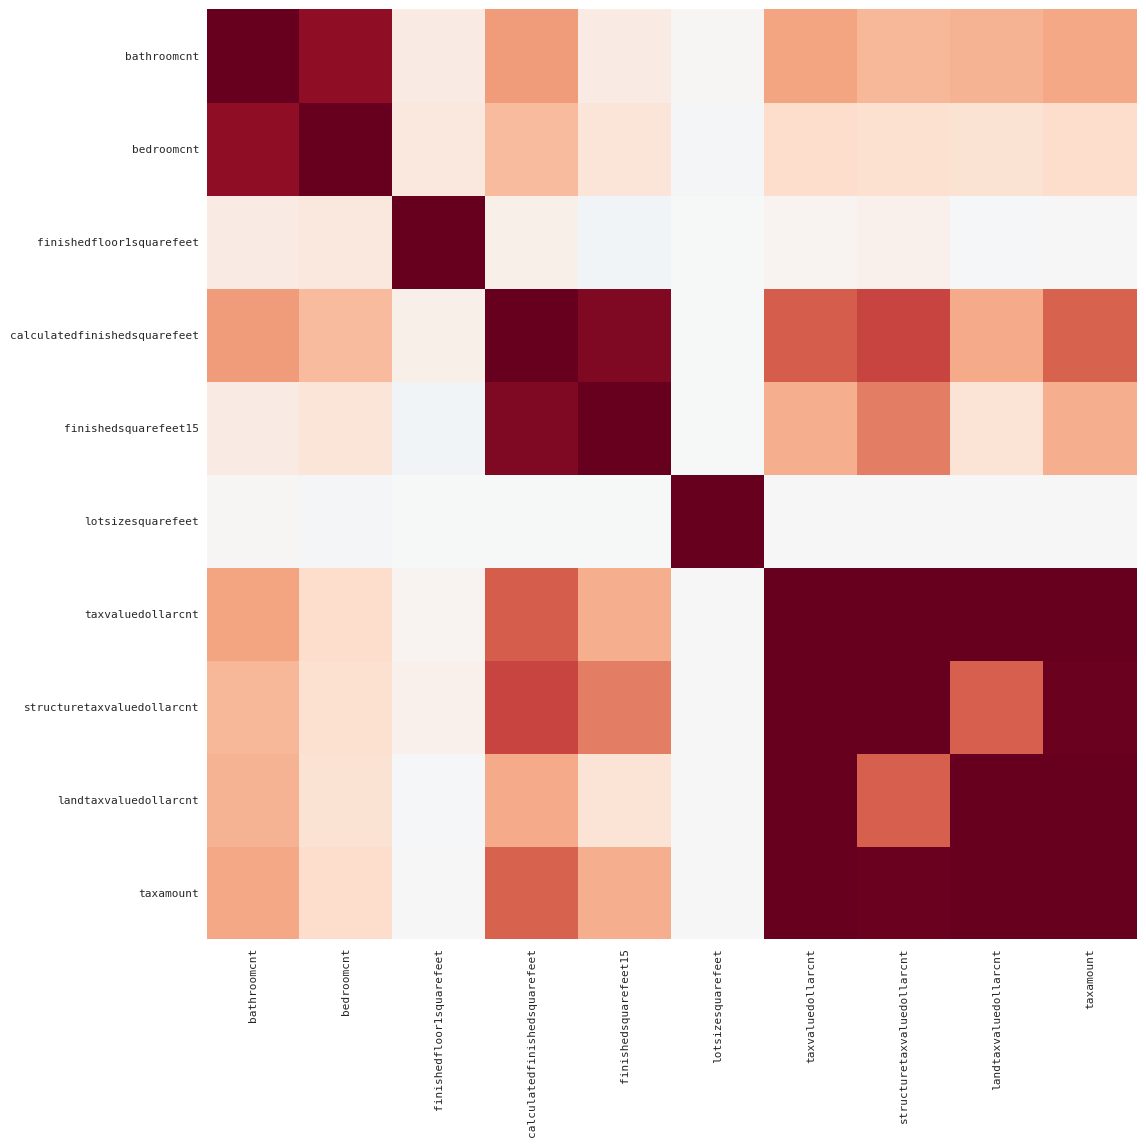

In [26]:
sb.set(context="paper", font="monospace")

# Load the datset
corrmatrix = dfDataForStats.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap using seaborn
sb.heatmap(corrmatrix, vmax=.8, square=True, cbar=False)

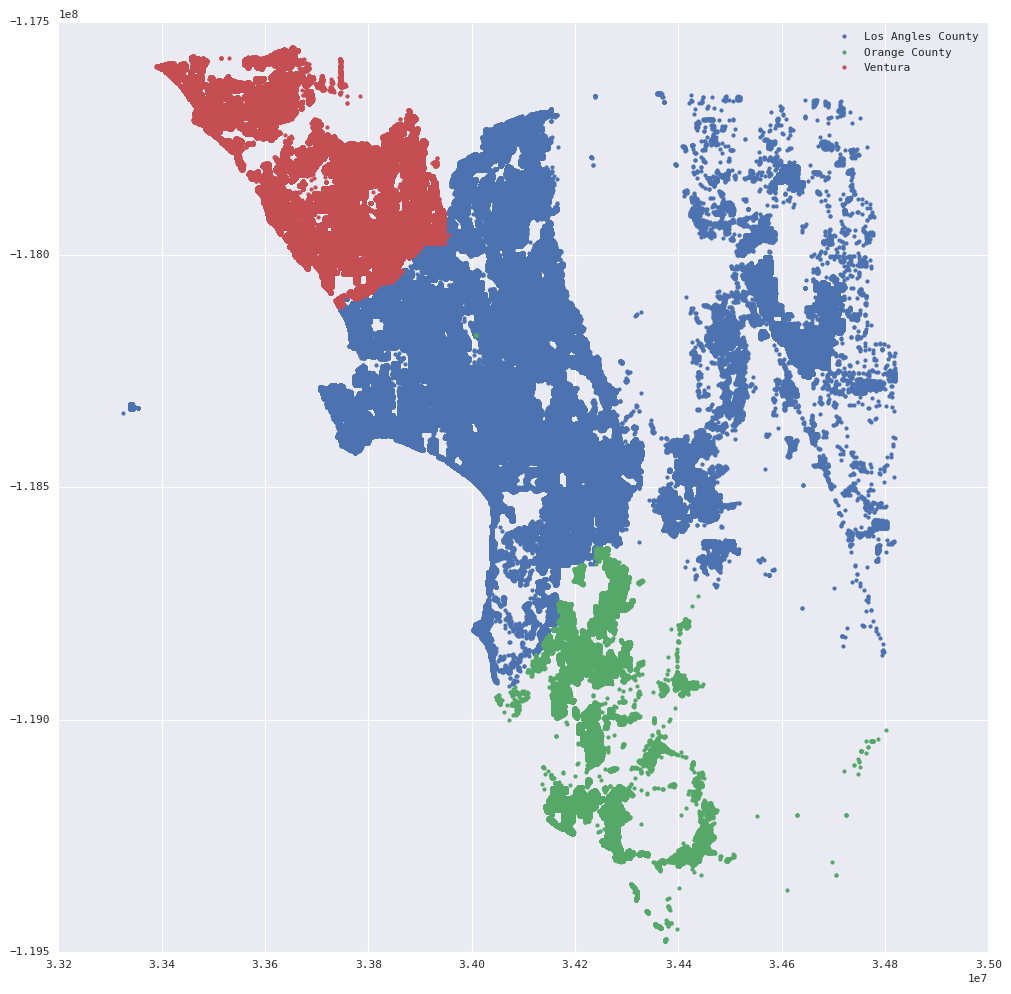

In [49]:
# Generate Data
x = dfForModel.latitude
y = dfForModel.longitude
labels = dfForModel.countyname
df = pd.DataFrame(dict(x=x, y=y, label=labels))

groups = df.groupby('label')

# Plot
fig, ax = plt.subplots(figsize=(12,12))
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle='', ms=6, label=name)
ax.legend()

plt.show()

In [50]:

zil_columns = dfForModel[['taxvaluedollarcnt','bedroomcnt','countyname']]
phase_1_2 = zil_columns.groupby(['countyname','bedroomcnt']).mean()
phase_1_2 = phase_1_2.reset_index()
phase_1_2.pivot('countyname','bedroomcnt','taxvaluedollarcnt').head()

bedroomcnt,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
countyname,,,,,,,,,,,,,,,,,,,,,
Los Angles County,566448.776219,244384.742140,301427.663672,346170.308047,469124.712865,755497.269611,8.283121e+05,1.005172e+06,6.827878e+05,7.492150e+05,...,1.201277e+06,762843.536188,1.563532e+06,1.163755e+06,917789.807692,882001.276923,445685.375,2804854.4,596857.333333,1.832988e+06
Orange County,273027.671178,208427.626004,261711.887866,344272.207820,445582.096302,649211.854953,8.556702e+05,1.025703e+06,1.288165e+06,1.394238e+06,...,1.741851e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ventura,330574.296456,239827.874749,333190.057077,420525.544790,531205.138466,819342.389073,1.063447e+06,1.308985e+06,1.598030e+06,1.647812e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
